In [1]:
# to do : for now, it only works with ones that finished. Run5total and run5_2 are others with results
# to do : see if you need to add back in planet roche

In [1]:
from models import *
from sort_OSPE_output import *
pd.set_option('display.max_rows', None)

removing adaptive timestep test files...
sorting files...
16 / 200 didn't survive (Roche lobe overflow)
0 / 200 didn't survive (in perturber Roche lobe)
132 / 200 survived
52 / 200 produced error
of the ones that survived:
9 / 132  unfinished
123 / 132  finished without error
average time: 7209876616.583027


In [2]:
starroche = np.transpose([int(i[19:-4]) for i in zeros]) # inner planet tidally disrupted by star
survived = np.transpose([int(i[19:-4]) for i in ones_and_twos])
planetroche = np.transpose([int(i[19:-4]) for i in threes]) # inner planet tidally disrupted by outer planet
failed = np.transpose([int(i[19:-4]) for i in negatives])

#crashed = [63, 4, 53, 60, 156, 198, 135, 132, 103, 10, 11, 108, 174, 200, 35, 6, 56]

In [3]:
def setup_ea_diagram():
    plt.figure(figsize=(8,6))
    plt.ylim(0,1.05);plt.xscale('log')
    plt.plot(a_subsat,e_subsat,'*',markersize=25,color='goldenrod',alpha=1,markeredgecolor='k')
    plt.xlabel('semi-major axis (au)',fontsize=20,family='serif')
    plt.ylabel('eccentricity',fontsize=20,family='serif')
    plt.xticks(fontsize=15);plt.yticks(fontsize=15);

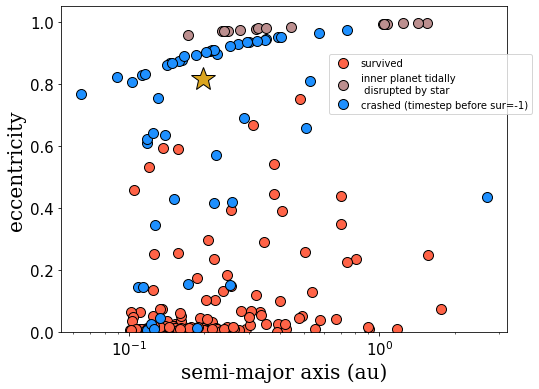

In [15]:
# include all model initial and final states
ai=[];ei=[]
survived_a=[];survived_e=[]
starroche_a=[];starroche_e=[]
failed_a=[];failed_e=[]
for n in range(1,401):
        if n in survived:
            m = Model(n)
            ai.append(m.a1[0])
            ei.append(m.e1[0])
            survived_a.append(m.a1[-1])
            survived_e.append(m.e1[-1])
        elif n in starroche:
            m = Model(n)
            ai.append(m.a1[0])
            ei.append(m.e1[0])
            starroche_a.append(m.a1[-1])
            starroche_e.append(m.e1[-1])
        elif n in failed:
            m = Model(n)
            ai.append(m.a1[0])
            ei.append(m.e1[0])
            failed_a.append(float(m.a1[-2]))
            failed_e.append(m.e1[-2])
            
mec = 'k';ms=10
setup_ea_diagram()            
#plt.plot(ai, ei, 'o', color='lightgrey', markersize=ms)
plt.plot(survived_a, survived_e, 'o', color='tomato',label='survived',\
         markersize=ms, markeredgecolor=mec)
plt.plot(starroche_a, starroche_e, 'o', color='rosybrown',label='inner planet tidally\n disrupted by star',\
         markersize=ms, markeredgecolor=mec)
plt.plot(failed_a, failed_e, 'o', color='dodgerblue',label='crashed (timestep before sur=-1)',\
         markersize=ms, markeredgecolor=mec)

plt.legend(loc=(0.6,0.67))

In [13]:
failed_a

[0.5100247,
 0.1029081,
 0.2252346,
 0.2112205,
 0.3514973,
 0.3474509,
 0.2583658,
 0.162606,
 0.1180155,
 0.1183482,
 0.06442991,
 0.1268797,
 0.2150514,
 0.2181236,
 0.1218366,
 0.1085702,
 0.1462775,
 0.2521333,
 0.218819,
 0.2727347,
 0.1129352,
 0.3022557,
 0.2227029,
 0.1867829,
 0.1303577,
 0.08943497,
 0.1257933,
 0.1584366,
 0.1183684,
 0.574801,
 0.2527686,
 0.1326721,
 0.1414373,
 0.1843946,
 0.1248555,
 0.1154058,
 0.3922551,
 -0.02680314,
 0.165396,
 0.5276946,
 0.3230446,
 0.2965293,
 0.1508003,
 0.2032718,
 0.2864554,
 0.1134046,
 0.1724403,
 0.1388582,
 0.4049107,
 0.7408213,
 2.688843,
 0.1478701]

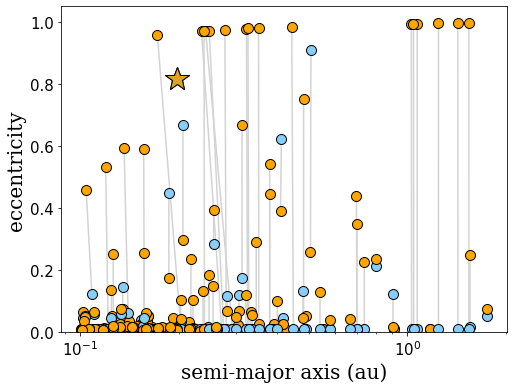

In [5]:
setup_ea_diagram()
for n in range(1,401):
    if n in survived or n in starroche or n in planetroche:
        m = Model(n)
        a=[m.a1[0], m.a1[-1]]
        e=[m.e1[0], m.e1[-1]]
        plt.plot(a, e, '-', linewidth=1.5,color='lightgrey')

        
for n in range(1,401):
    if n in survived or n in starroche or n in planetroche:
        m = Model(n)        
        plt.plot(m.a1[0], m.e1[0],'o',color='lightskyblue',markeredgecolor=mec,markersize=ms)
        plt.plot(m.a1[-1], m.e1[-1],'o',color='orange',markeredgecolor=mec,markersize=ms)
        
plt.plot(a_subsat,e_subsat,'*',markersize=25,color='goldenrod',alpha=1,markeredgecolor='k')

In [7]:
# investigate one that starts at a=100
for n in range(0,401):
    if n in survived or n in starroche or n in planetroche:
        m=Model(n)
        if m.a1[0]>m.a2[0]:
            print(n)
        
#turns out it was stable, but accidentally put a1>a2